In [1]:
# We want pandas and our scaler:

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Preset pandas as Df for scaler

from sklearn import set_config
set_config(transform_output="pandas")

In [3]:
# Install scikit newest version

# pip install scikit-learn --upgrade

In [4]:
# Load Csv:

df_5k_songs = pd.read_csv(r'df_audio_features_5000.csv')

In [5]:
#  Strip whitespaces & clean columns

df_5k_songs.columns = df_5k_songs.columns.str.strip()
df_5k_songs_cl = df_5k_songs.drop(['id','html','type', 'time_signature'], axis=1)

df_5k_songs.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [6]:
# Create title, drop name, artist column

df_5k_songs_cl['title'] = df_5k_songs_cl['artist'] + ' - ' + df_5k_songs_cl['name']
df_5k_songs_cl = df_5k_songs_cl.drop(['name', 'artist'], axis=1)
df_5k_songs_cl.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,title
0,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,Gilberto Gil ...
1,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,Antônio Carlos Jobim ...
2,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,Martinho Da Vila ...
3,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,Chico César ...
4,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,Kurt Elling ...


In [7]:
# Slice only energy & tempo and set title

df_5k_songs_energy_tempo = df_5k_songs_cl[['title','energy','tempo']].copy()

# Sort by title

df_5k_songs_energy_tempo.sort_values(by='title', ascending=True, inplace=True)

# Set title as index

df_5k_songs_energy_tempo.set_index('title', inplace=True)

In [8]:
df_5k_songs_energy_tempo. head()

,energy,tempo
title,,
*NSYNC - Bye Bye Bye,0.870,172.716
-M- - Solidarité,0.777,82.414
2CELLOS - Candle in the Wind,0.104,112.161
2CELLOS - Hurt,0.208,77.305
2CELLOS - I Don't Care,0.315,102.033


## Scaling with standartscaler

In [9]:
# StScaler - Create Df
st_scaler = StandardScaler()

# Transformation here
df_5k_songs_energy_tempo_scaled = st_scaler.fit_transform(df_5k_songs_energy_tempo)

df_5k_songs_energy_tempo.sample(10)

,energy,tempo
title,,
Beyoncé - If I Were a Boy,0.504,89.946
Nelly - Hot In Herre,0.728,107.082
Cenotaph - Crying Frost,0.890,97.980
Ñejo & Dalmata - Algo Musical,0.626,107.023
Missy Elliott - Work It,0.677,101.868
The Maytals - 54-46 Was My Number,0.355,159.104
Sepultura - Arise,0.961,115.336
Maria Gasolina - Karoliina Kaunis,0.215,130.338
R3HAB - Freak,0.872,125.934


In [10]:
# Display age column of original DataFrame and age column of MinMaStandard scaledxed DataFrame to compare
pd.DataFrame({
    'original': df_5k_songs_energy_tempo.iloc[:,-1], 
    'standard_scale': df_5k_songs_energy_tempo_scaled.iloc[:,-1]
}).sort_values(by='original')

,original,standard_scale
title,,
Taylor Swift - Shake It Off,0.000,-4.156077
"Johann Sebastian Bach - French Suite No. 5 in G Major, BWV 816: I. Allemande",34.856,-2.935874
Morpheus Descends - Immortal Coil,42.817,-2.657184
Hauschka - Sunset Monet,49.654,-2.417841
Oscar Peterson Trio - I Got It Bad And That Ain't Good,49.689,-2.416616
...,...,...
Little Richard - Ready Teddy,205.973,3.054414
Otis Redding - (Sittin' On) the Dock of the Bay,205.981,3.054695
Duane Eddy - Rebel Rouser,206.313,3.066317


In [11]:
# 

pd.DataFrame({
    'original': df_5k_songs_energy_tempo.iloc[:,-2], 
    'standard_scale': df_5k_songs_energy_tempo_scaled.iloc[:,-2]
}).sort_values(by='original')

,original,standard_scale
title,,
Taylor Swift - Shake It Off,0.000000,-2.266902
Keith Fullerton Whitman - Track3a (2waynice),0.000020,-2.266832
"Ennio Morricone - Deborah's Theme (From ""Once upon a Time in America"")",0.000436,-2.265390
"George Frideric Handel - Handel Sarabande Variation (Arr. for Piano from Sarabande, HWV 437)",0.000791,-2.264159
"Arnold Schoenberg - Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.000930,-2.263676
...,...,...
Post Mortem - Armies Of The Dead,0.999000,1.198149
Mickie Krause - Supa Deutschland - Medley,0.999000,1.198149
Tim Toupet - Ich bin ein Döner - Single Version,0.999000,1.198149


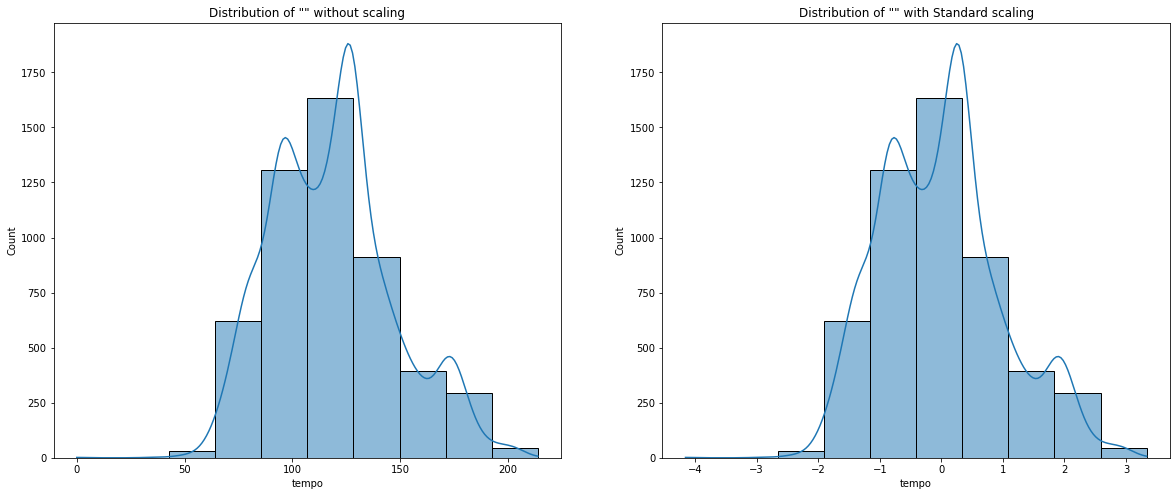

In [12]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df_5k_songs_energy_tempo.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(df_5k_songs_energy_tempo_scaled.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of "" without scaling')
ax2.set_title('Distribution of "" with Standard scaling')

plt.show()

In [13]:
# # Making the DataFrame for the Standard heatmap
# df_5k_songs_energy_tempo_standard_distances = pd.DataFrame(pairwise_distances(df_5k_songs_energy_tempo_scaled), index=df_5k_songs_energy_tempo.index, columns=df_5k_songs_energy_tempo.index)

# # Stating that we want two plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# # Plotting the two plots
# sns.heatmap(df_5k_songs_energy_tempo, ax=ax1, linewidths=.2);
# sns.heatmap(df_5k_songs_energy_tempo_standard_distances, ax=ax2, linewidths=.2);

# # Adding titles to the plots
# ax1.set_title('Everything NOT in the same 1-10 scaling')
# ax2.set_title('Everything Standard scaled')

# plt.show()

## KMeans

In [14]:
# Applying Kmeans, chose quantity of cluster

df_5k_songs_energy_tempo_cluster_model = KMeans(n_clusters=6)

# Feed data & transform(?)

df_5k_songs_energy_tempo_cluster_model.fit(df_5k_songs_energy_tempo_scaled)
df_5k_songs_energy_tempo_cluster_model

Z:\Progs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

my_model = df_5k_songs_energy_tempo_cluster_model

In [15]:
# Clustercenterposition

df_5k_songs_energy_tempo_cluster_model.cluster_centers_

array([[-0.34353655,  0.09236504],
       [ 0.78603158,  0.29845489],
       [-1.6105025 , -1.18667479],
       [ 0.53657624, -0.85827191],
       [ 0.54498565,  1.749968  ],
       [-1.58497986,  0.85805726]])

In [16]:
# Create DataFrame of Standard scaled values

df_5k_songs_energy_tempo_cluster_position = pd.DataFrame(df_5k_songs_energy_tempo_cluster_model.cluster_centers_)
# Rename cause of length
df_5k_song_e_t_cl_pos = df_5k_songs_energy_tempo_cluster_position

df_5k_song_e_t_cl_pos.columns = ['energy','tempo']
df_5k_song_e_t_cl_pos

,energy,tempo
0,-0.343537,0.092365
1,0.786032,0.298455
2,-1.610502,-1.186675
3,0.536576,-0.858272
4,0.544986,1.749968
5,-1.584980,0.858057


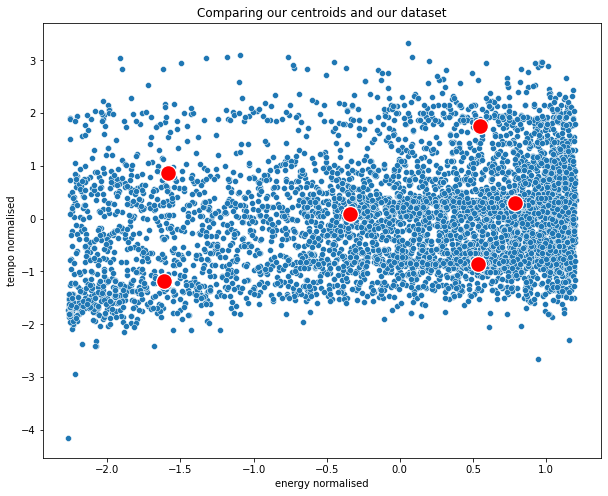

In [17]:
#Comparing our centroids and our dataset

fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(df_5k_songs_energy_tempo_scaled)
plot_data.columns = ['energy','tempo']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('energy normalised')
plt.ylabel('tempo normalised')
sns.scatterplot(data=plot_data, x='energy', y='tempo')
sns.scatterplot(data=df_5k_song_e_t_cl_pos, x='energy', y='tempo', color='red', s=250)
plt.show()

In [18]:
df_5k_songs_energy_tempo_cluster_model.labels_

array([4, 3, 2, ..., 0, 3, 3])

In [19]:
# Putting the array into a list of names and add into column

df_5k_songs_energy_tempo_scaled['cluster'] = df_5k_songs_energy_tempo_cluster_model.labels_
df_5k_songs_energy_tempo.sample(5)

,energy,tempo
title,,
Die Fantastischen Vier - Einfach Sein,0.550,147.095
Suffocation - Infecting the Crypts,0.952,119.286
The Shins - New Slang,0.943,136.027
Maria Gasolina - Madalena,0.207,93.531
Bobbie Gentry - Ode To Billie Joe,0.189,120.142


In [20]:
# Mean of data

clustered_centroids_st = df_5k_songs_energy_tempo_scaled.groupby('cluster').mean()
clustered_centroids_st

,energy,tempo
cluster,,
0,-0.339503,0.092291
1,0.786437,0.299250
2,-1.609653,-1.185716
3,0.536855,-0.858702
4,0.544559,1.751099
5,-1.582979,0.854817


<AxesSubplot:>

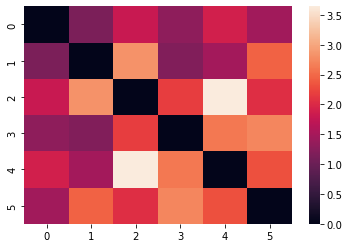

In [21]:
distances_centroids = pairwise_distances(df_5k_songs_energy_tempo_cluster_model.cluster_centers_)
sns.heatmap(distances_centroids)

In [22]:
# Calculating inertia

max_clusters = 15

inertia_list_st = []

for i in range(1,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(df_5k_songs_energy_tempo_scaled)
  inertia_list_st.append(round(model_loop.inertia_,3))

print(inertia_list_st)

[22716.689, 13168.091, 7217.786, 4625.905, 3026.567, 1820.704, 1638.088, 1484.191, 1371.642, 1232.271, 1116.417, 1023.87, 967.613, 876.855]


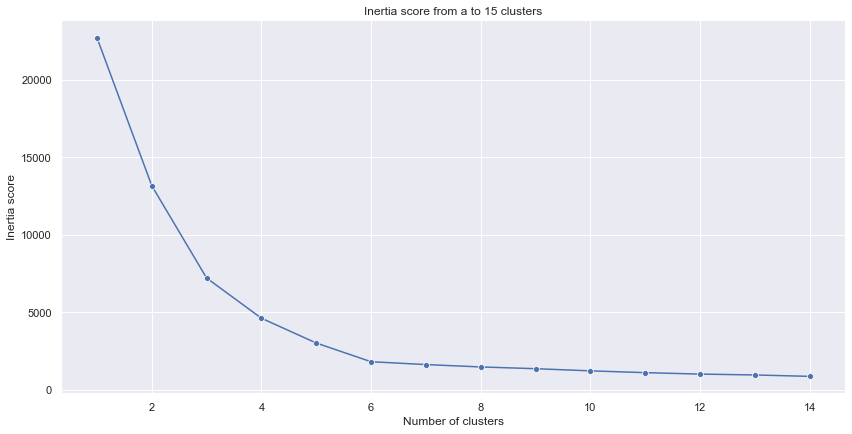

In [23]:
#Elbowmethod

sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(1,max_clusters),y=inertia_list_st,marker='o',height=6,aspect=2)
    .set(title=f"Inertia score from a to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Inertia score")
);

In [24]:
silhouette_score(df_5k_songs_energy_tempo_scaled,df_5k_songs_energy_tempo_cluster_model.labels_)

0.6438803477791002

In [25]:
# Silhouette score
max_clusters = 14

silhouette_list = []

for i in range(2,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(df_5k_songs_energy_tempo_scaled)
  score = silhouette_score(df_5k_songs_energy_tempo_scaled,model_loop.labels_)
  silhouette_list.append(round(score,2))

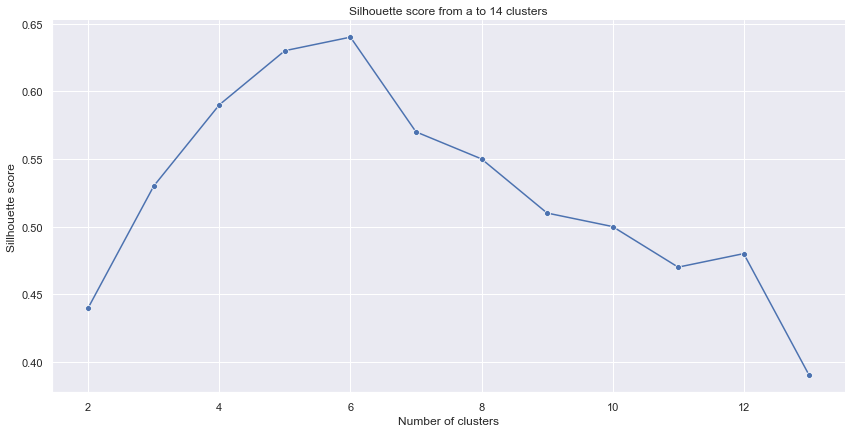

In [26]:
# Elbowmethod #2

sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(2,max_clusters),y=silhouette_list,marker='o',height=6,aspect=2)
    .set(title=f"Silhouette score from a to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Sillhouette score")
);

* For k = 2 the average to silhouette is: 0.4375
	- For cluster = 0 the silhouette value is: 0.26
	- For cluster = 1 the silhouette value is: 0.68
* For k = 3 the average to silhouette is: 0.5334
	- For cluster = 0 the silhouette value is: 0.46
	- For cluster = 1 the silhouette value is: 0.62
	- For cluster = 2 the silhouette value is: 0.49
* For k = 4 the average to silhouette is: 0.5857
	- For cluster = 0 the silhouette value is: 0.71
	- For cluster = 1 the silhouette value is: 0.57
	- For cluster = 2 the silhouette value is: 0.43
	- For cluster = 3 the silhouette value is: 0.63
* For k = 5 the average to silhouette is: 0.6265
	- For cluster = 0 the silhouette value is: 0.61
	- For cluster = 1 the silhouette value is: 0.57
	- For cluster = 2 the silhouette value is: 0.7
	- For cluster = 3 the silhouette value is: 0.66
	- For cluster = 4 the silhouette value is: 0.63
* For k = 6 the average to silhouette is: 0.6439
	- For cluster = 0 the silhouette value is: 0.69
	- For cluster = 1 th

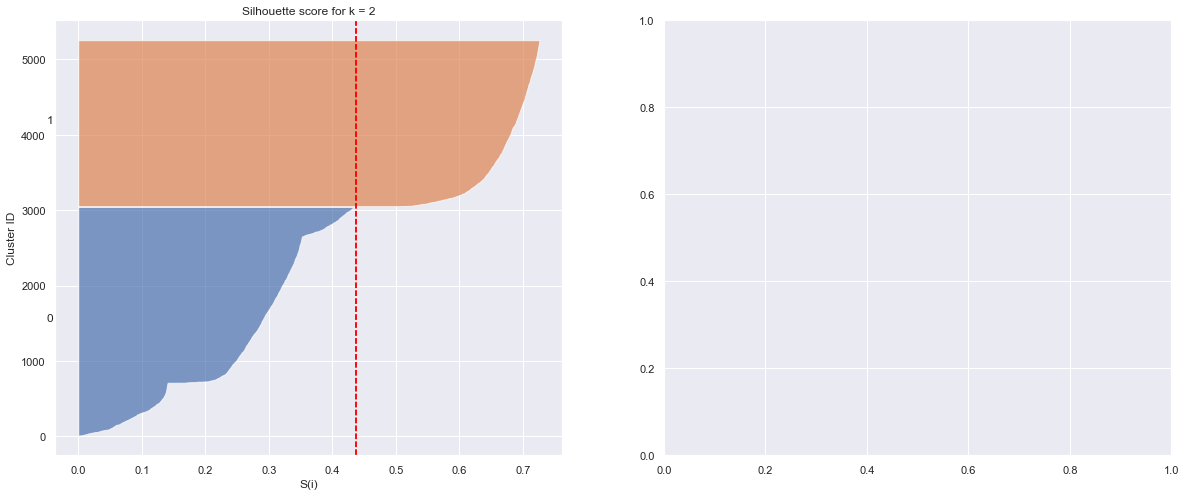

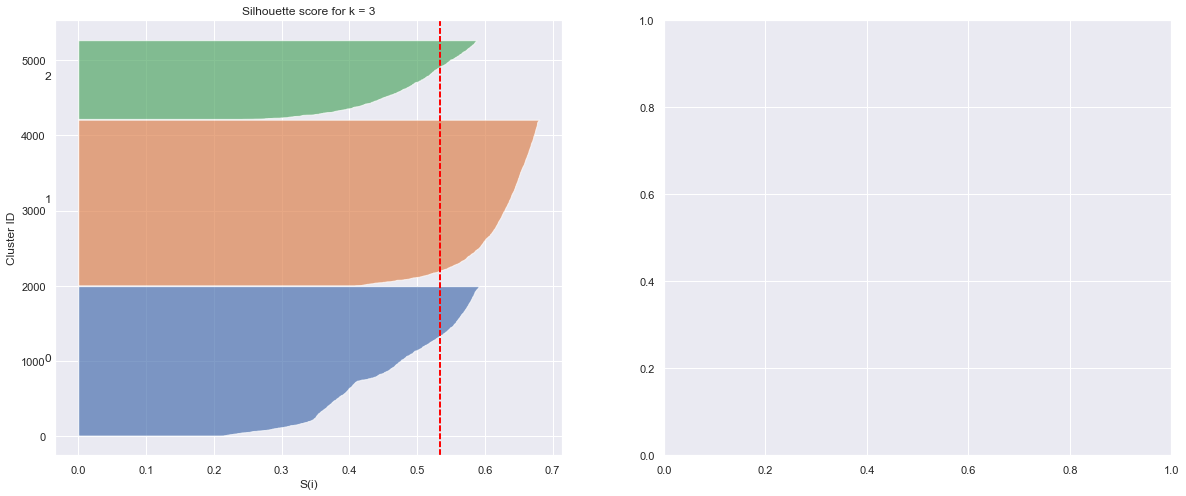

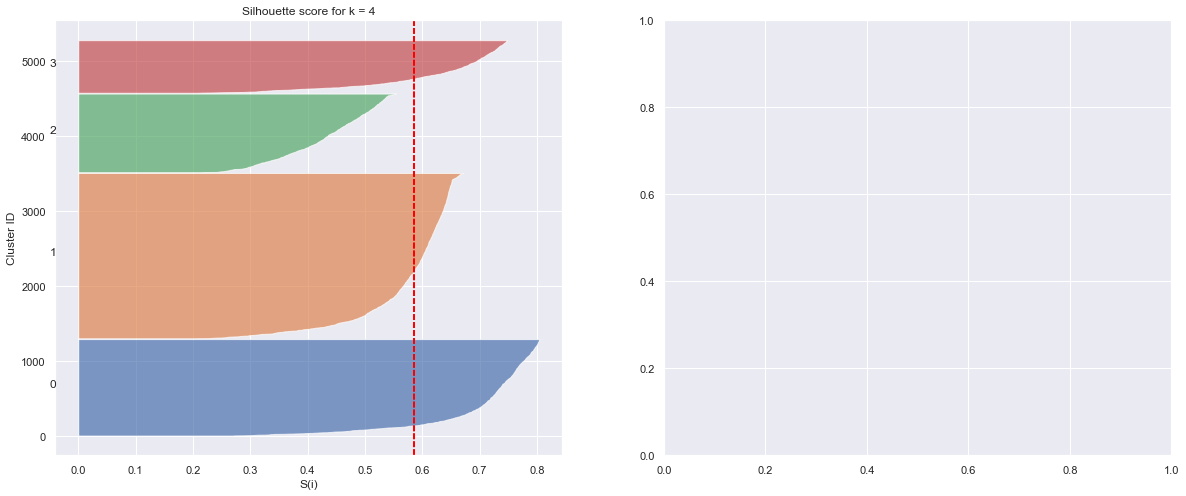

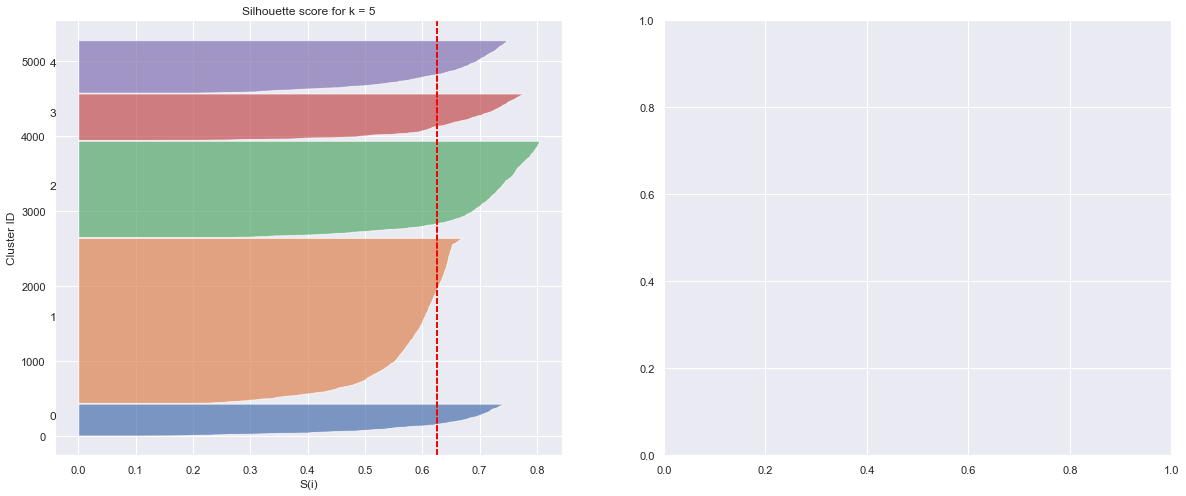

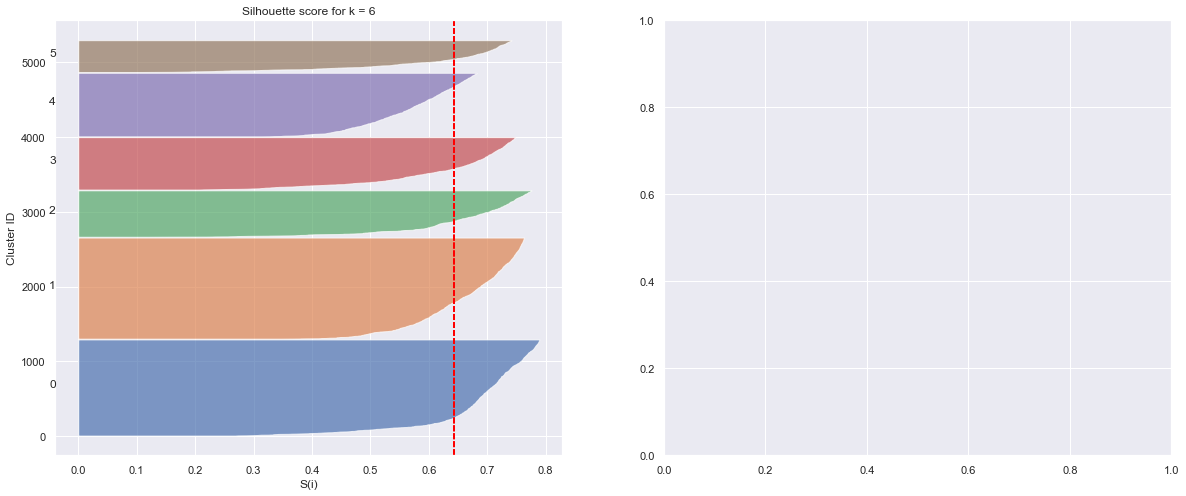

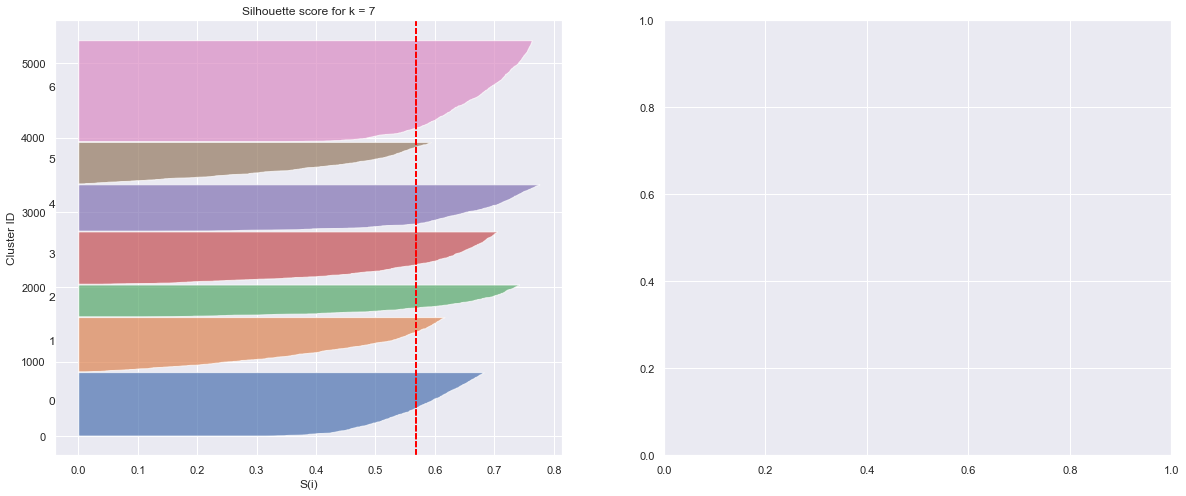

In [27]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 8
data = df_5k_songs_energy_tempo_scaled

for k in range(2, max_k): 
    kmean_model = KMeans(n_clusters=k,n_init=10,random_state=123).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            silhouette_avg = silhouette_score(df_5k_songs_energy_tempo_scaled, labels)
            axis1.axvline(x=silhouette_avg, color="red", linestyle="--")
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")
plt.show()